# Section 1

**Read the Data**

In [383]:
import pandas as pd 
import numpy as np 

In [384]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data set/Recent_Contract_Awards.csv',parse_dates=['StartDate','EndDate'],low_memory=False)

In [7]:
data.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
0,20120228019,2012-03-05,2012-03-05,Homeless Services,Award,Human Services/Client Services,ANTI-EVICTION SERVICES,Negotiated Acquisition,Procurement,Other (Describe below in Other Legally Mandate...,07112A031412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-04(b)(2)(iii)of the Procurement Policy Board...,NaN,NaN,NaN,NaN,ANTI-EVICTION SERVICES - Negotiated Acquisitio...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20130214013,2013-02-22,2013-02-22,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Request for Proposals,Procurement,NaN,CWP2012A-M7-CG,NaN,NaN,NaN,NaN,NaN,25655.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AdamEric, Inc.","478A Lafayette Avenue, Brooklyn, NY 11205",DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20130131010,2013-02-06,2013-02-06,Parks and Recreation,Award,Services (other than human services),PARKS AND RECREATION NOTICES OF AWARD,Public Bid,Procurement,NaN,CWB2013A AND 2012A/B,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARKS AND RECREATION NOTICES OF AWARD - Public...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20090911004,2009-09-18,2009-09-18,Transportation,Award,Services (other than human services),"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",Sole Source,Procurement,Other (Describe below in Other Legally Mandate...,......,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Since the concession will not yield a profit t...,NaN,NaN,NaN,NaN,"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20140821015,2014-08-28,2014-08-28,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-E62-C,NaN,NaN,NaN,NaN,NaN,1130412.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MUN Trading Corporation,"37-38 84th Street, Apt. 21, Jackson Heights, N...",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Q1:**
> - Keep only rows with a StartDate occurring from 2010 to 2019, inclusive. Next, remove all rows for which the ContractAmount field is less than or equal to zero, or is missing entirely. Use this filtered data for the rest of the challenge, as well. For the remaining data, what is the total sum of contract amounts?

In [385]:
### Keep rows from 2010 to 2019, inclusive. 
data_1 = data[(data['StartDate'] >= '2010-01-01') & (data['StartDate'] <= '2019-12-31')]
### remove all rows less than or equal to zero
data_1 = data_1[data_1['ContractAmount'].notna()]
### remove all rows missing entirely
data_1 = data_1.drop(data_1[data_1['ContractAmount'] <= 0].index)

In [126]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18198 entries, 1 to 35499
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   RequestID                     18198 non-null  int64         
 1   StartDate                     18198 non-null  datetime64[ns]
 2   EndDate                       18198 non-null  datetime64[ns]
 3   AgencyName                    18198 non-null  object        
 4   TypeOfNoticeDescription       18198 non-null  object        
 5   CategoryDescription           18198 non-null  object        
 6   ShortTitle                    18198 non-null  object        
 7   SelectionMethodDescription    18198 non-null  object        
 8   SectionName                   18198 non-null  object        
 9   SpecialCaseReasonDescription  6871 non-null   object        
 10  PIN                           18198 non-null  object        
 11  DueDate                     

In [386]:
### Sum of remaining ContractAmount
np.sum(data_1['ContractAmount'])

207783514028.18

**Q2**
> - Determine the number of contact by each agency. For the top five agaencies in terms of amount. Compute the mean amount for each agency. What is the ratio of highest mean contract to the second highest. 

In [387]:
### Find the mean for each agency
data_1.groupby(['AgencyName'])['ContractAmount'].mean()

AgencyName
Administration for Children's Services    6.911672e+06
Administrative Trials and Hearings        7.933455e+05
Aging                                     1.047908e+06
Battery Park City Authority               4.207367e+05
Board of Correction                       4.963165e+04
                                              ...     
Taxi and Limousine Commission             6.917359e+04
Teachers' Retirement System               1.150000e+05
Transportation                            1.202160e+07
Veterans' Services                        4.690000e+05
Youth and Community Development           5.910403e+04
Name: ContractAmount, Length: 64, dtype: float64

In [388]:
### 2: Caculate the ratio
6.911672e+06 / 7.933455e+05

8.712057987345993

**Q3**
> - Consider only procurements made by the Citywide Administrative Services agency and compute the sum contract amount awarded to each unique vendor. What proportion of the total number of contracts in the data set were awarded to the top 50 vendors?

In [389]:
### Extract AgencyName as Citywide Administrative Services
city_wide = data_1[data_1['AgencyName'] == 'Citywide Administrative Services']
### group by Vendor Name and caculate the sum for each vendor 
vender_sum = city_wide.groupby(['VendorName'])['ContractAmount'].sum()
vender_sum = pd.DataFrame(vender_sum) ### Turn into dataframe for better visual representation
vender_sum = vender_sum.reset_index(level=0) ### Turn the index into column

In [132]:
vender_sum.head()

,VendorName,ContractAmount
0,"12813 Rockaway Blvd., Corp dba Ozone Park Lumber",728195.70
1,161-12 46th Avenue Lease Corp DBA Magic Collis...,509883.34
2,161-12 46th Avenue Lease Corp. dba Magic Colli...,764825.00
3,"161-12 46th Avenue Lease Corp., dba Magic Coll...",555025.00
4,2 KR Systems LLC,147188.96


In [390]:
### Caculate the total sum and top 50 sum then find the percentage
Total_sum = np.sum(vender_sum['ContractAmount'])
top_50_sum = np.sum(vender_sum.iloc[:51,]['ContractAmount'])
top_50_sum / Total_sum

0.002754360069626131

**Q4**
> - Do agencies publish procurement notices uniformly throughout the week? As an example, consider the agency of Parks and Recreation. For this agency, compute the weekday for which each notice was published, and perform a Chi-squared test on the null hypothesis that each weekday occurs equally often. Report the value of the test statistic.

In [391]:
from scipy.stats import chisquare

In [392]:
### Keep only Parks and Recreation with start date & ID 
park_Recre = data_1[data_1['AgencyName'] == 'Parks and Recreation']
park_Recre = park_Recre.loc[:,['RequestID','StartDate']]
### Caculate the week day for this agency 
park_Recre['weekday'] = park_Recre['StartDate'].dt.day_name()

In [135]:
park_Recre

,RequestID,StartDate,weekday
1,20130214013,2013-02-22,Friday
4,20140821015,2014-08-28,Thursday
5,20140821014,2014-08-28,Thursday
9,20130315030,2013-03-22,Friday
10,20130415019,2013-04-22,Monday
...,...,...,...
35409,20161110015,2016-11-18,Friday
35415,20170807013,2017-08-11,Friday
35430,20180116020,2018-01-25,Thursday
35431,20181203018,2018-12-12,Wednesday


In [393]:
### Find the procument for each weekday and do Chi-test
print(park_Recre['weekday'].value_counts())
f_observe = [130,163,145,119,152]
print('\n')
print(chisquare(f_obs=f_observe))

Tuesday      163
Friday       152
Wednesday    145
Monday       130
Thursday     119
Name: weekday, dtype: int64


Power_divergenceResult(statistic=8.623413258110013, pvalue=0.07123340164293498)


**Q5:**
> - For this question, consider only contracts with in the categories of Construction Related Services and Construction/Construction Services. The ShortTitle field contains a description of the procured goods/services for each contract. Compute the sum contract amount for contracts whose ShortTitle refer to 'CENTRAL PARK' and for those which refer to 'WASHINGTON SQUARE PARK'. What is the ratio of total construction and contruction-related expenditure for the Central Park contracts compared to the Washington Square Park contracts? Note: you should ensure that 'PARK' appears on its own and not as the beginning of another word.

In [394]:
### Find contracts with in the categories of Construction Related Services and Construction/Construction Services.
construction_1 = data_1[(data_1['CategoryDescription'] == 'Construction/Construction Services')]
construction_2 = data_1[(data_1['CategoryDescription'] == 'Construction Related Services')]
construction = construction_1.append(construction_2)
### Reset Index From 0
construction.reset_index(drop=True,inplace=True)
### Extract the Short Title
Title = construction['ShortTitle']

In [395]:
### find Short Title contain 'Central Park' & "Washionton Park"
for i,t in Title.iteritems():
  if 'CENTRAL PARK' in t: 
    print(i,t)
  elif 'WASHINGTON SQUARE PARK' in t:
    print(i,t)
### Get the new Dataframe & reindex 
Central_Washionton_Construction = construction.iloc[[70,1421,1942,3072],:]
Central_Washionton_Construction = Central_Washionton_Construction.loc[:,['RequestID','CategoryDescription','ShortTitle','ContractAmount']]
Central_Washionton_Construction.reset_index(drop=True,inplace=True)

70 INSTALLATION OF LIGHTS AND TRAFFIC SIGNALS IN THE CENTRAL PARK
1421 RECONSTRUCTION OF THE LANDSCAPE ALONG THE GRAND CENTRAL PARKWAY
1942 WATER MAIN CONNECTION AT WASHINGTON SQUARE PARK, ETC. - BOROUGH OF MANHATTAN
3072 CONSTRUCTION SERVICES FOR THE CONSTRUCTION OF THE CENTRAL PARK ZOO GARAGE


In [185]:
Central_Washionton_Construction

,RequestID,CategoryDescription,ShortTitle,ContractAmount
0,20150713025,Construction/Construction Services,INSTALLATION OF LIGHTS AND TRAFFIC SIGNALS IN ...,12864125.60
1,20100604019,Construction/Construction Services,RECONSTRUCTION OF THE LANDSCAPE ALONG THE GRAN...,134189.64
2,20150324003,Construction/Construction Services,WATER MAIN CONNECTION AT WASHINGTON SQUARE PAR...,8939669.24
3,20100513003,Construction Related Services,CONSTRUCTION SERVICES FOR THE CONSTRUCTION OF ...,200000.00


In [396]:
### Caculate the ratio between Central_Park_Construction_Fee and Washionton_Park_Construction_Fee
Central_Park_Construction_Fee = np.sum(Central_Washionton_Construction.iloc[[0,1,3],3])
Washionton_Park_Construction_Fee = np.sum(Central_Washionton_Construction.iloc[2,3])
print(Central_Park_Construction_Fee / Washionton_Park_Construction_Fee)

1.4763762378304726


**Q6 ???**
> - Is there a predictable, yearly pattern of spending for certain agencies? As an example, consider the Environmental Protection agency. For each month from 2010 through the end of 2019, compute the monthly expenditure for each agency. Once again, use StartDate for the contract date. Then, with a lag of 12 months, report the autocorrelation for total monthly expenditure.

In [194]:
EP_Agency = data_1[data_1['AgencyName'] == 'Environmental Protection']
EP_Agency = EP_Agency.loc[:,['RequestID','StartDate','ContractAmount']]
EP_Agency.sort_values(by='StartDate',inplace=True)

EP_Agency['Year'] = EP_Agency['StartDate'].dt.year
EP_Agency['Month'] = EP_Agency['StartDate'].dt.month

EP_Agency.reset_index(drop=True,inplace=True)

In [213]:
EP_Agency.head()

,RequestID,StartDate,ContractAmount,Year,Month
0,20100125020,2010-02-01,11008308.00,2010,2
1,20100125021,2010-02-01,648830.22,2010,2
2,20100316027,2010-03-22,1372000.00,2010,3
3,20100316014,2010-03-22,13749000.00,2010,3
4,20100317010,2010-03-23,583400.00,2010,3


In [214]:
EP_Agency_Year_Month = EP_Agency.groupby(['Year','Month'])['ContractAmount'].sum()

In [218]:
EP_Agency_Year_Month = pd.DataFrame(EP_Agency_Year_Month)

In [227]:
EP_Agency_Year_Month.head()

ContractAmount
Year Month                
2010 2         11657138.22
     3         23454472.00
     4          6084658.11
     5          1491812.00
     6          2454927.00

In [228]:
from statsmodels.tsa.stattools import acf

In [229]:
acf(EP_Agency_Year_Month['ContractAmount'],nlags=12)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.0062669 , -0.05097649, -0.04473055, -0.02082958,
       -0.02142397, -0.02008075, -0.02355079, -0.03459056, -0.00257002,
       -0.01934144, -0.01234619,  0.0092233 ])

**Q7**
> - Consider only contracts awarded by the Citywide Administrative Services agency in the category Goods. Compute the total yearly expenditure (using StartDate) for these contracts and fit a linear regression model to these values. What is the R^2 value for this model?

In [397]:
City_Wide_Goods = data_1[(data_1['AgencyName'] == 'Citywide Administrative Services') & (data_1['CategoryDescription'] == 'Goods')]

City_Wide_Goods.reset_index(drop=True,inplace=True)

City_Wide_Goods = City_Wide_Goods.loc[:,['PIN','StartDate','ContractAmount']]

City_Wide_Goods['year'] = City_Wide_Goods['StartDate'].dt.year

In [398]:
City_Wide_Goods.tail()

,PIN,StartDate,ContractAmount,year
4744,8571100775,2012-01-04,370890.00,2012
4745,8571400523,2014-08-26,166938.80,2014
4746,8571000435,2010-12-09,242416.80,2010
4747,1400191,2013-12-27,332469.81,2013
4748,8571500643,2015-12-23,492242.70,2015


In [399]:
### Caculate the yearly expenditure for each contract PIN
Yearly_contract_expenditure = pd.DataFrame(City_Wide_Goods.groupby(['PIN','year'])['ContractAmount'].sum())
Yearly_contract_expenditure.reset_index(level=(0,1),inplace=True)

Yearly_contract_expenditure.loc[Yearly_contract_expenditure['year'] == 2011,'year'] = 0
Yearly_contract_expenditure.loc[Yearly_contract_expenditure['year'] == 2015,'year'] = 1
Yearly_contract_expenditure.loc[Yearly_contract_expenditure['year'] == 2013,'year'] = 2
Yearly_contract_expenditure.loc[Yearly_contract_expenditure['year'] == 2014,'year'] = 3
Yearly_contract_expenditure.loc[Yearly_contract_expenditure['year'] == 2010,'year'] = 4
Yearly_contract_expenditure.loc[Yearly_contract_expenditure['year'] == 2018,'year'] = 5
Yearly_contract_expenditure.loc[Yearly_contract_expenditure['year'] == 2017,'year'] = 6
Yearly_contract_expenditure.loc[Yearly_contract_expenditure['year'] == 2016,'year'] = 7
Yearly_contract_expenditure.loc[Yearly_contract_expenditure['year'] == 2019,'year'] = 8

In [400]:
### Caculate the R^2. x as year - categorical y as contract amount (numerical)
x = Yearly_contract_expenditure['year']
y = Yearly_contract_expenditure['ContractAmount']

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(r_value**2)

0.0004930655597451434


**Q8**
> - In this question, we will examine whether contract expenditure goes to companies located within or outside of New York City. To do so, we will extract the ZIP codes from the VendorAddress field. The ZIP codes pertaining to New York City can be found at the following URL: https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm. Looking only at contracts with a StartDate in 2018, compute the total expenditure for contracts awarded to vendors listing NYC addresses and those located elsewhere. Report the proportion of the total expenditures awarded to the NYC vendors.

In [401]:
NY = data_1.copy()
NY = NY.loc[:,['RequestID','ContractAmount','StartDate','PIN','VendorName','VendorAddress']]
NY['Year'] = NY['StartDate'].dt.year
NY = NY[NY['Year'] == 2018]
NY.reset_index(drop=True,inplace=True)
NY['zip'] = NY['VendorAddress'].str[-5:]


In [516]:
### Remove punctuation and character from column
kk = [''.join(c for c in s if c not in string.punctuation) for s in NY['zip']]

zip_reform = []

for i in kk:
  z = re.sub("[^0-9]", "", i)
  zip_reform.append(i)

NY['zip'] = zip_reform

In [548]:
NY.head()

,RequestID,ContractAmount,StartDate,PIN,VendorName,VendorAddress,Year,zip,NY_City
0,20180726005,3695800.0,2018-08-01,82617WM00304,"Hatch Associates Consultants, Inc.","100 Sylvan Parkway, Suite 200, Amherst, NY 14228",2018,14228,1
1,20181205004,7575925.0,2018-12-11,17OPMOT02401A02,"Accenture Federal Services, LLC",800 North Glebe Road Suite 300 Arlington VA 22203,2018,22203,0
2,20180806008,135200.0,2018-08-13,CWB-2018-A,"Pats Ice Cream, Inc.","114 Harbour Lane, West Bayshore, NY 11706",2018,11706,1
3,20181108035,5458941.0,2018-11-16,82618WM00339,"Arcadis of New York, Inc.","27-01 Queens Plaza North, Suite 800, Long Isla...",2018,11101,1
4,20180508027,90000.0,2018-05-15,226005,Strength In Numbers Consulting,"22 West 27th Street, Fl # 5, New York, NY 10001",2018,10001,1


In [405]:
import requests
from bs4 import BeautifulSoup
import string 

r = requests.get('https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm')
soup = BeautifulSoup(r.text,'html.parser')

zip_code_list = soup.find_all('table',{'summary':" "})

zip_code_NY = []

for c in zip_code_list:
  list_line = c.find_all('td',{'headers':'header3'})
  for l in list_line:
    zip_code_NY.append(l.text)

In [480]:
### Web Scrapping to get the ZIP code
ZIP = pd.Series(zip_code_NY)
ZIP.to_csv('/content/drive/My Drive/Colab Notebooks/Data set/ZIP.csv',index=False)
ZIP_Code = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data set/ZIP.csv')
array = ZIP_Code.values
array = array.reshape((1,42))
L = [''.join(c for c in s if c not in string.punctuation) for s in array]

In [ ]:
### Found vendor in NY
for index,value in NY['VendorAddress'].items():
  if 'New York' in value:
    NY.iloc[index,8] = 1 

In [553]:
### Caculate the result 
Total_Expenditure_New_York = np.sum(NY.loc[NY['NY_City']==1,'ContractAmount'])
Total_Expenditure_None_NY = np.sum(NY.loc[NY['NY_City']==0,'ContractAmount'])
Total_Expenditure = Total_Expenditure_New_York + Total_Expenditure_None_NY
Proportion_to_NY = Total_Expenditure_New_York / Total_Expenditure
print(Proportion_to_NY)

0.7342999911236907


**Final Summary for The Section 1**

In [ ]:
import pandas as pd 
import numpy as np 
from scipy.stats import chisquare
from statsmodels.tsa.stattools import acf
import requests
from bs4 import BeautifulSoup
import string 
data = pd.read_csv('/content/drive/My Drive/Recent_Contract_Awards.csv',parse_dates=['StartDate'])
### Q1 
data_1 = data[(data['StartDate'] >= '2010-01-01') & (data['StartDate'] <= '2019-12-31')]
data_1 = data_1[data_1['ContractAmount'].notna()]
data_1 = data_1.drop(data_1[data_1['ContractAmount'] <= 0].index)
np.sum(data_1['ContractAmount'])
### Q2: 
data_1.groupby(['AgencyName'])['ContractAmount'].mean()
6.911672e+06 / 7.933455e+05
### Q3: 
city_wide = data_1[data_1['AgencyName'] == 'Citywide Administrative Services']
vender_sum = city_wide.groupby(['VendorName'])['ContractAmount'].sum()
vender_sum = pd.DataFrame(vender_sum) 
vender_sum = vender_sum.reset_index(level=0)
Total_sum = np.sum(vender_sum['ContractAmount'])
top_50_sum = np.sum(vender_sum.iloc[:51,]['ContractAmount'])
top_50_sum / Total_sum
### Q4:
park_Recre = data_1[data_1['AgencyName'] == 'Parks and Recreation']
park_Recre = park_Recre.loc[:,['RequestID','StartDate']]
park_Recre['weekday'] = park_Recre['StartDate'].dt.day_name()
print(park_Recre['weekday'].value_counts())
f_observe = [130,163,145,119,152]
print('\n')
print(chisquare(f_obs=f_observe))
### Q5: 
construction_1 = data_1[(data_1['CategoryDescription'] == 'Construction/Construction Services')]
construction_2 = data_1[(data_1['CategoryDescription'] == 'Construction Related Services')]
construction = construction_1.append(construction_2)
construction.reset_index(drop=True,inplace=True)
Title = construction['ShortTitle']
for i,t in Title.iteritems():
  if 'CENTRAL PARK' in t: 
    print(i,t)
  elif 'WASHINGTON SQUARE PARK' in t:
    print(i,t)
Central_Washionton_Construction = construction.iloc[[70,1421,1942,3072],:]
Central_Washionton_Construction = Central_Washionton_Construction.loc[:,['RequestID','CategoryDescription','ShortTitle','ContractAmount']]
Central_Washionton_Construction.reset_index(drop=True,inplace=True)
Central_Park_Construction_Fee = np.sum(Central_Washionton_Construction.iloc[[0,1,3],3])
Washionton_Park_Construction_Fee = np.sum(Central_Washionton_Construction.iloc[2,3])
print(Central_Park_Construction_Fee / Washionton_Park_Construction_Fee)
### Q6: Not Sure (Auto Correlation for 12 lag has 12 values)
EP_Agency = data_1[data_1['AgencyName'] == 'Environmental Protection']
EP_Agency = EP_Agency.loc[:,['RequestID','StartDate','ContractAmount']]
EP_Agency.sort_values(by='StartDate',inplace=True)
EP_Agency['Year'] = EP_Agency['StartDate'].dt.year
EP_Agency['Month'] = EP_Agency['StartDate'].dt.month
EP_Agency.reset_index(drop=True,inplace=True)
EP_Agency_Year_Month = EP_Agency.groupby(['Year','Month'])['ContractAmount'].sum()
EP_Agency_Year_Month = pd.DataFrame(EP_Agency_Year_Month)
acf(EP_Agency_Year_Month['ContractAmount'],nlags=12)
### Q7: Not Sure What are the independent varaible. 
City_Wide_Goods = data_1[(data_1['AgencyName'] == 'Citywide Administrative Services') & (data_1['CategoryDescription'] == 'Goods')]
City_Wide_Goods.reset_index(drop=True,inplace=True)
City_Wide_Goods = City_Wide_Goods.loc[:,['PIN','StartDate','ContractAmount']]
City_Wide_Goods['year'] = City_Wide_Goods['StartDate'].dt.year
Yearly_contract_expenditure = pd.DataFrame(City_Wide_Goods.groupby(['PIN','year'])['ContractAmount'].sum())
Yearly_contract_expenditure.reset_index(level=(0,1),inplace=True)
x = Yearly_contract_expenditure['year']
y = Yearly_contract_expenditure['ContractAmount']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(r_value**2)
### Q8:
NY = data_1.copy()
NY = NY.loc[:,['RequestID','ContractAmount','StartDate','PIN','VendorName','VendorAddress']]
NY['Year'] = NY['StartDate'].dt.year
NY = NY[NY['Year'] == 2018]
NY.reset_index(drop=True,inplace=True)
NY['zip'] = NY['VendorAddress'].str[-5:]
NY['NY_City'] = 0 
kk = [''.join(c for c in s if c not in string.punctuation) for s in NY['zip']]
zip_reform = []
for i in kk:
  z = re.sub("[^0-9]", "", i)
  zip_reform.append(i)
NY['zip'] = zip_reform
r = requests.get('https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm')
soup = BeautifulSoup(r.text,'html.parser')
zip_code_list = soup.find_all('table',{'summary':" "})
zip_code_NY = []
for c in zip_code_list:
  list_line = c.find_all('td',{'headers':'header3'})
  for l in list_line:
    zip_code_NY.append(l.text)
ZIP = pd.Series(zip_code_NY)
ZIP.to_csv('/content/drive/My Drive/Colab Notebooks/Data set/ZIP.csv',index=False)
ZIP_Code = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data set/ZIP.csv')
array = ZIP_Code.values
array = array.reshape((1,42))
L = [''.join(c for c in s if c not in string.punctuation) for s in array]
for index,value in NY['VendorAddress'].items():
  if 'New York' in value:
    NY.iloc[index,8] = 1 
Total_Expenditure_New_York = np.sum(NY.loc[NY['NY_City']==1,'ContractAmount'])
Total_Expenditure_None_NY = np.sum(NY.loc[NY['NY_City']==0,'ContractAmount'])
Total_Expenditure = Total_Expenditure_New_York + Total_Expenditure_None_NY
Proportion_to_NY = Total_Expenditure_New_York / Total_Expenditure
print(Proportion_to_NY)

# Section 2

In [170]:
import numpy as np
from scipy.spatial import distance as d 
import matplotlib.pyplot as plt
import seaborn as sns 
from statistics import stdev

In [171]:
### 10 Move 
def random_index(x,y): 
  for token in range(0,10):
    token = int(np.random.choice(list(range(1,9)),size=1,p=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]))

    if token == 1:
      x -= 1
      y -= 2
########
    elif token == 2:
      x-=1
      y+=2
########
    elif token == 3:
      x-=2
      y+=1
########
    elif token == 4:
      x-=2
      y-=1
########
    elif token == 5:
      x+=1
      y-=2
########
    elif token == 6:
      x+=1
      y+=2
########
    elif token == 7:
      x+=2
      y-=1
########
    else:
      x+=2
      y+=1
  if x < 0 or y < 0:
    return None
  else:
    return x, y

In [172]:
### Randomly run the 10 move 1000 times
holder = []
for _ in range(0,1000):
  x = random_index(x=0,y=0)
  holder.append(x)

### All distance for 1000 times
distance = []
for i in holder:
  if i != None:
    dis = d.euclidean((0,0),i)
    distance.append(dis)

### Large Than 10
large_than_10 = []
for i in distance:
  if i >= 10:
    large_than_10.append(i)

In [173]:
### 10 move euclidiean distance for 1000 times - median 
print(np.median(distance))
### 10 move euclidiean distance for 1000 times - larget than 10 distance - median 
print(np.median(large_than_10))

5.830951894845301
10.770329614269007


In [181]:
### STD
print(stdev(distance))
print(stdev(large_than_10))

3.1335739563860825
1.502300414074829


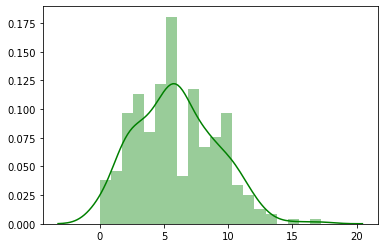

In [174]:
sns.distplot(distance,color='green',bins=20)

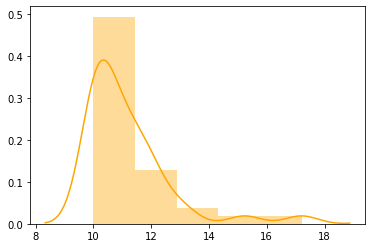

In [175]:
sns.distplot(large_than_10,color='orange',bins=5)

In [176]:
### 100 Move 
def random_index_100(x,y): 
  for token in range(0,100):
    token = int(np.random.choice(list(range(1,9)),size=1,p=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]))

    if token == 1:
      x -= 1
      y -= 2
########
    elif token == 2:
      x-=1
      y+=2
########
    elif token == 3:
      x-=2
      y+=1
########
    elif token == 4:
      x-=2
      y-=1
########
    elif token == 5:
      x+=1
      y-=2
########
    elif token == 6:
      x+=1
      y+=2
########
    elif token == 7:
      x+=2
      y-=1
########
    else:
      x+=2
      y+=1
  if x < 0 or y < 0:
    return None
  else:
    return x, y

In [177]:
holder_100 = []
for _ in range(0,1000):
  x = random_index_100(x=0,y=0)
  holder_100.append(x)

### All distance for 1000 times
distance_100 = []
for i in holder_100:
  if i != None:
    dis = d.euclidean((0,0),i)
    distance_100.append(dis)

In [178]:
### 100 move euclidiean distance for 1000 times - median 
print(np.median(distance_100))

20.0


In [182]:
### STD
print(stdev(distance_100))

10.736916666880777


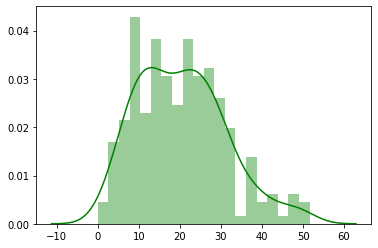

In [179]:
sns.distplot(distance_100,color='green',bins=20)

**Final Summary for The Section 2**

In [ ]:
import numpy as np
from scipy.spatial import distance as d 
import matplotlib.pyplot as plt
import seaborn as sns 
from statistics import stdev

### Create a user defined function to simulate the random 10 move / 100 move
move = 10 
# move = 100 
def random_index(x,y): 
  for token in range(0,move):
    token = int(np.random.choice(list(range(1,9)),size=1,p=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]))

    if token == 1:
      x -= 1
      y -= 2
########
    elif token == 2:
      x-=1
      y+=2
########
    elif token == 3:
      x-=2
      y+=1
########
    elif token == 4:
      x-=2
      y-=1
########
    elif token == 5:
      x+=1
      y-=2
########
    elif token == 6:
      x+=1
      y+=2
########
    elif token == 7:
      x+=2
      y-=1
########
    else:
      x+=2
      y+=1
  if x < 0 or y < 0:
    return None
  else:
    return x, y

### Randomly run the 10 move 1000 times
holder = []
for _ in range(0,1000):
  x = random_index(x=0,y=0)
  holder.append(x)

### All 10 move distance for 1000 times
distance = []
for i in holder:
  if i != None:
    dis = d.euclidean((0,0),i)
    distance.append(dis)

### All 10 move distance for 1000 times (Large Than 10) 
large_than_10 = []
for i in distance:
  if i >= 10:
    large_than_10.append(i)

### 10 move euclidiean distance for 1000 times - median 
print(np.median(distance))
### 10 move euclidiean distance for 1000 times - larget than 10 distance - median 
print(np.median(large_than_10))
### 10 move STD
print(stdev(distance))
print(stdev(large_than_10))

### Randomly run the 100 move 1000 times
holder_100 = []
for _ in range(0,1000):
  x = random_index_100(x=0,y=0)
  holder_100.append(x)

### All 100 move distance for 1000 times
distance_100 = []
for i in holder_100:
  if i != None:
    dis = d.euclidean((0,0),i)
    distance_100.append(dis)

### 100 move euclidiean distance for 1000 times - median 
print(np.median(distance_100))
### 100 move STD
print(stdev(distance_100))